# Data Import

In [1]:
import random
import tesiRFX.plot_drawer as plot_drawer  # custom module
import tesiRFX.filters as filters  # custom module
import tesiRFX.data_parser as data_parser  # custom module

database = data_parser.create_db("tesiRFX/data")
random_sample = random.sample(database, 4)  # random sample of 4 elements

len db with duplicates: 463
len db without duplicates: 239


# Simple Moving Average
The Simple Moving Average filter calculates the mean of a fixed-size window of data points and assigns this mean value to the middle data point of the window

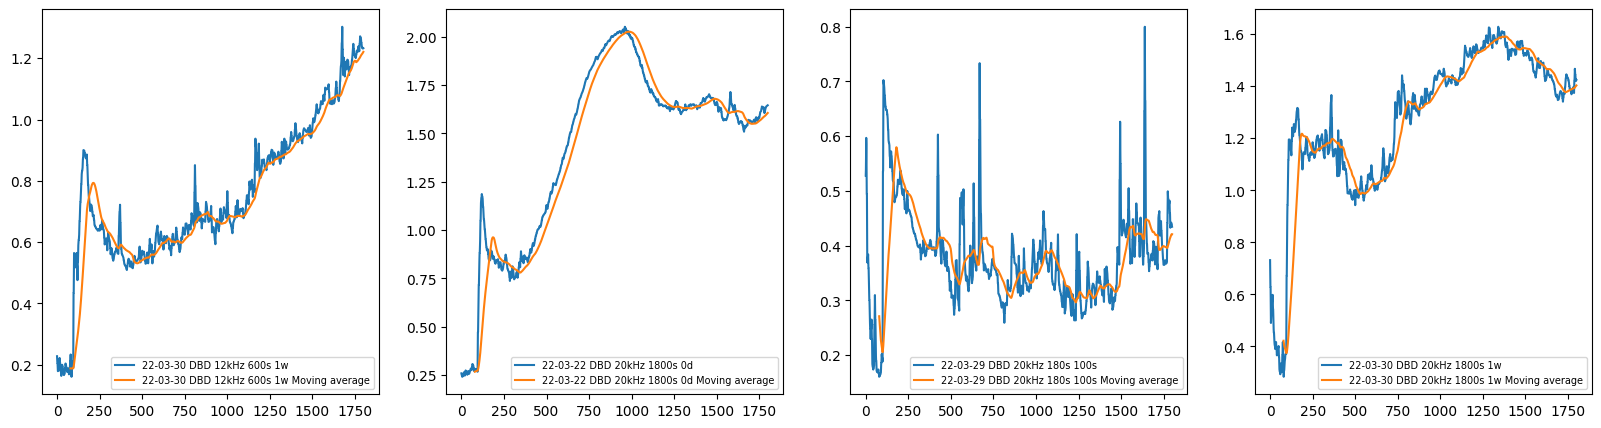

In [2]:
WIN_SIZE = 80

smoothed_list = filters.get_mov_avg(random_sample, WIN_SIZE)
plot_drawer.plot(random_sample, smoothed_list, "Moving average")

# Simple Exponential Smoothing (SES)
$s_t = αx_t+(1-α)s_{t-1}$
* suitable for forecasting data with no clear trend or seasonal pattern
* the weights attached to the observations decrease exponentially as we go back in time for the term $s_{t-1}$

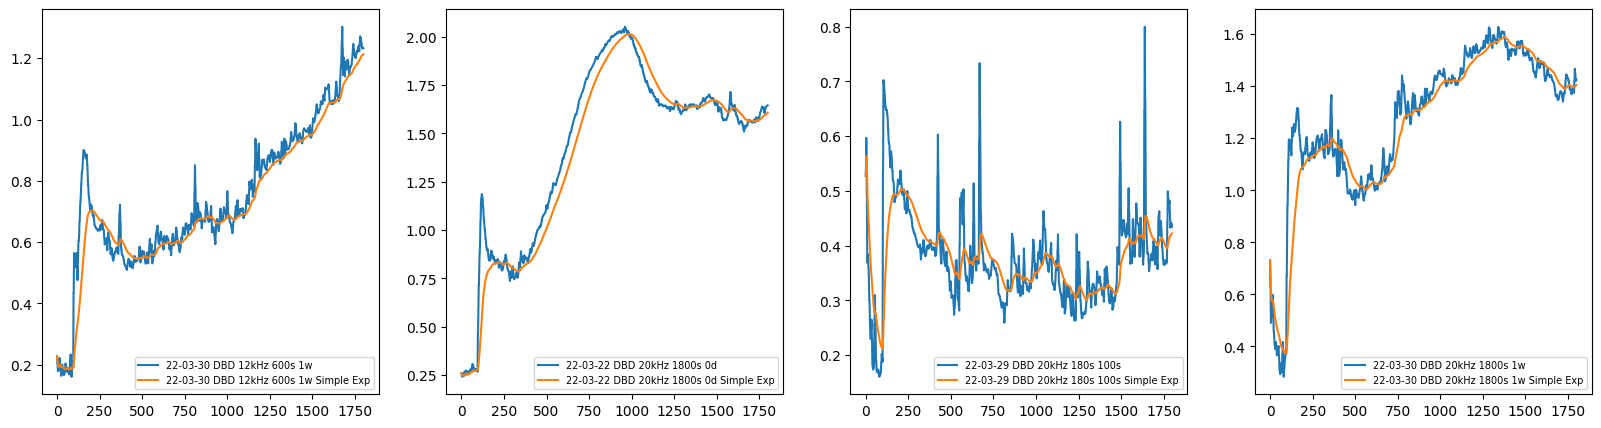

In [3]:
ALPHA = 0.02

smoothed_list = filters.get_simple_exp(random_sample, ALPHA)

plot_drawer.plot(random_sample, smoothed_list, "Simple Exp")

# Savitzky–Golay Filter
 It works by fitting a local polynomial to a window of data points and replacing the central point with the value of the polynomial
 * Useful for non-uniform sampling frequency or high frequency noise

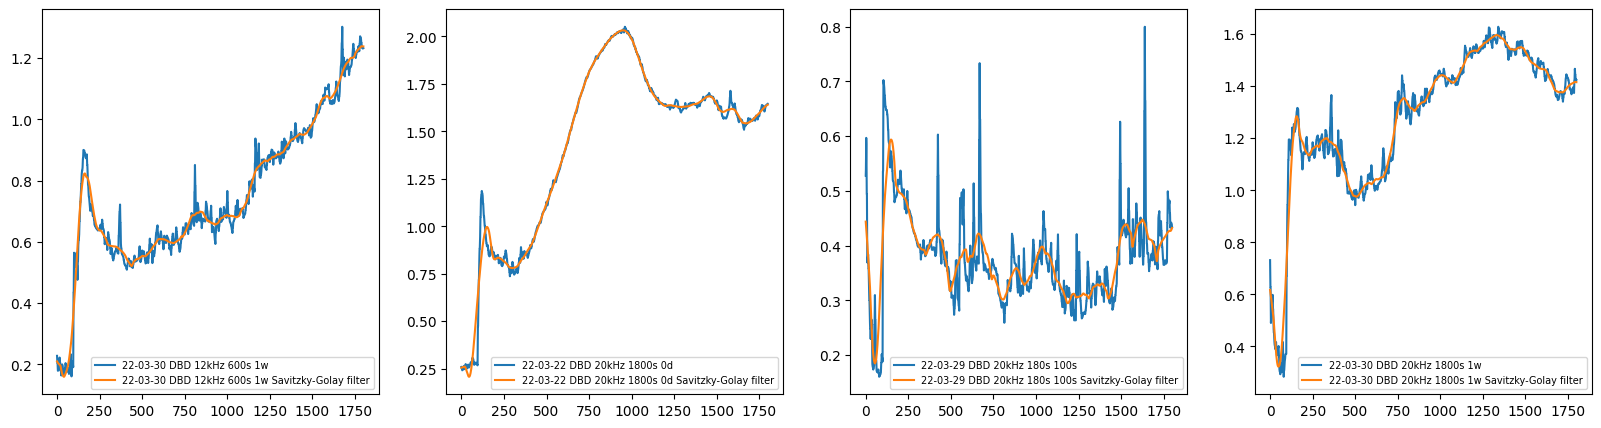

In [4]:
WINDOW_LEN = 150
POLY_ORDER = 2

smoothed_list = filters.get_savitzy_golay(random_sample, WINDOW_LEN, POLY_ORDER)

plot_drawer.plot(random_sample, smoothed_list, "Savitzky-Golay filter")

# Fast Fourier Transform (FFT)
Using the Fast Fourier Transform (FFT) to smooth data in order to remove high-frequency noise or fluctuations from a time-domain signal.

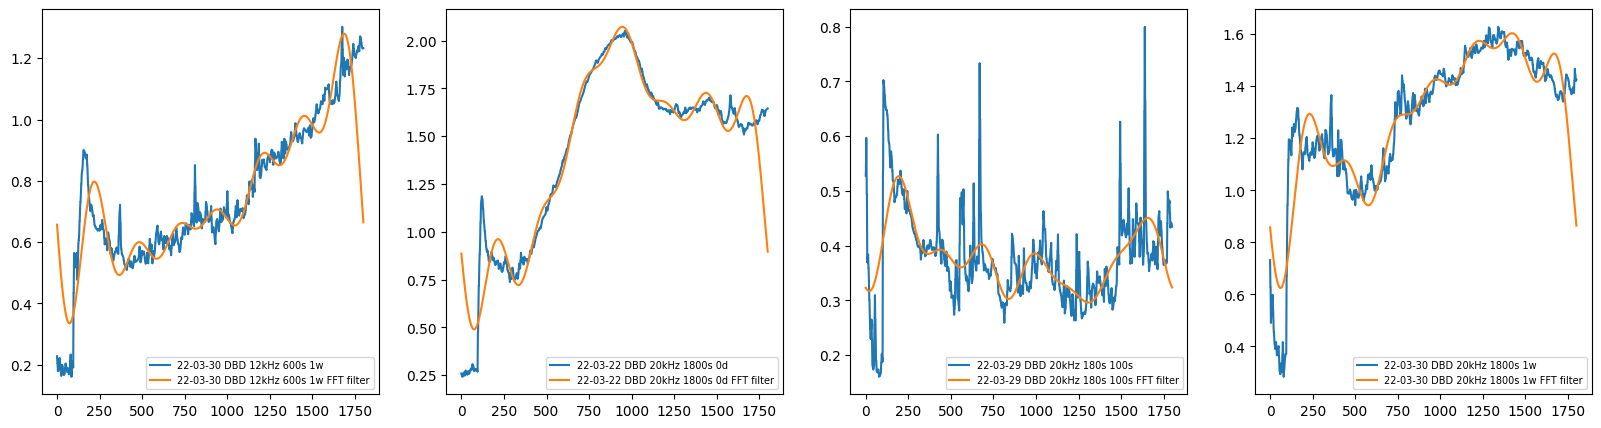

In [5]:
N_FREQUENCY = 8

smoothed_list = filters.get_FFT(random_sample, N_FREQUENCY)

plot_drawer.plot(random_sample, smoothed_list, "FFT filter")

# Alpha-trimming median filter
In practice alpha is the number of elements to be discarded.Since our filter is symmetric one alpha is an even non negative number less than size of the filter window. Minimum value for alpha parameter is zero and in this case alpha-trimmed mean filter degenerates into mean filter. Maximum value for alpha is filter window size minus one and in this case filter degenerates into median filter.

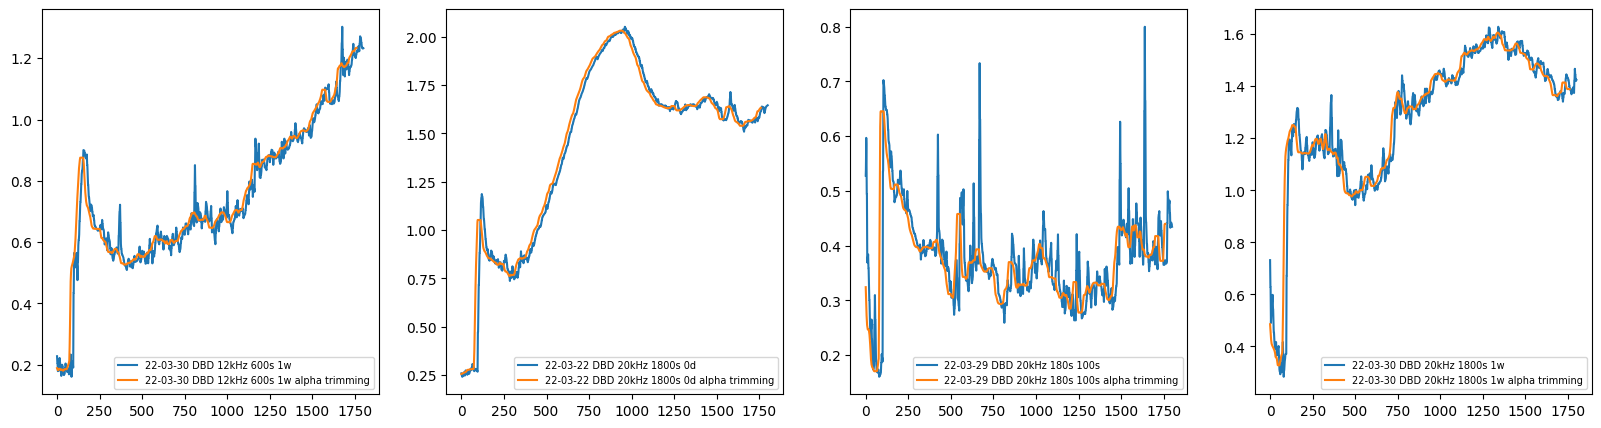

In [9]:
ALPHA = 32
WIN_SIZE = 40

smoothed_list = filters.alpha_trimmed_mean_filter(random_sample, WIN_SIZE, ALPHA)
plot_drawer.plot(random_sample, smoothed_list, "alpha trimming")